**IPL 2022 Capstone Project**

The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

column names: Variable Type

* date : string
* venue : string
* stage : string
* team1 : string
* team2 : string
* toss_winner : string
* toss_decision : string
* first_ings_score : integer
* second_ings_score : integer
* match_winner : string
* won_by : string
* margin : integer
* player_of_the_match : string
* top_scorer : string
* highscore : integer
* best_bowling : string
* best_bowling_fgure : string
* gure : string


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
ipl = pd.read_csv("IPL.csv")
ipl.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


**Basic Information**

In [6]:
ipl.shape

(74, 20)

In [8]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Now let's see how many columns have null values in total.

In [7]:
ipl.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

**Now, Here comes some Basic Questions**

1. Which team won the most matches?

C:\Users\ashif\AppData\Local\Temp\ipykernel_2308\88219560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values , y=team_wins.index, palette="rainbow")


<Axes: ylabel='match_winner'>

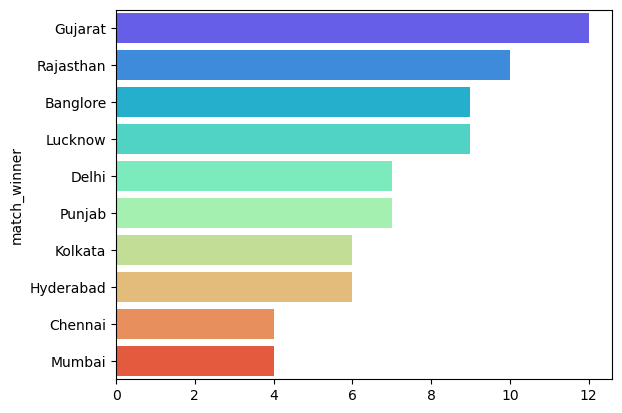

In [13]:
team_wins = ipl["match_winner"].value_counts()
sns.barplot(x=team_wins.values , y=team_wins.index, palette="rainbow")

2. Toss Decision Trends

C:\Users\ashif\AppData\Local\Temp\ipykernel_2308\3600336300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ipl["toss_decision"] , palette="viridis" )


<Axes: xlabel='toss_decision', ylabel='count'>

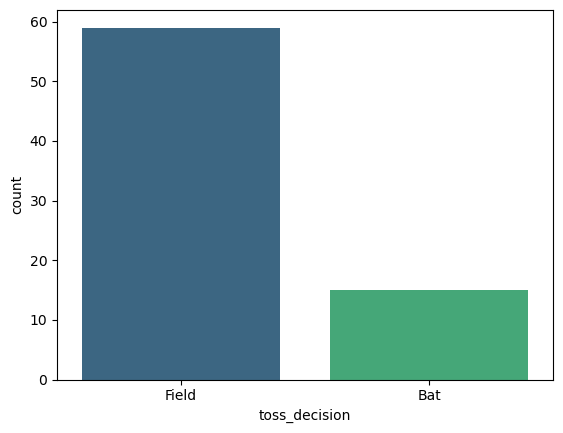

In [18]:
sns.countplot(x=ipl["toss_decision"] , palette="viridis" )

3. Toss Winner vs Match Winner

<Axes: title={'center': 'Toss winners'}, ylabel='toss_winner'>

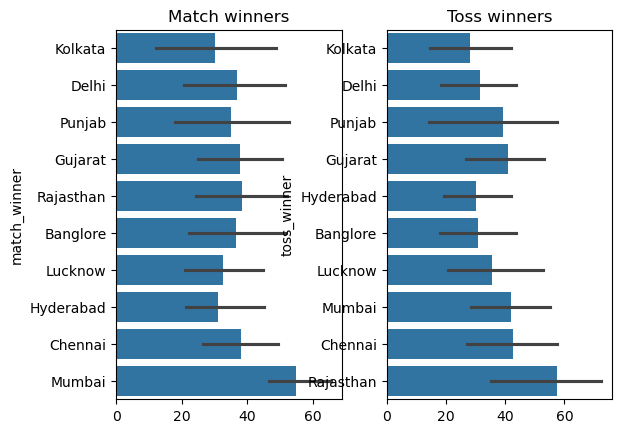

In [27]:
both_win =  ipl[ipl["toss_winner"] == ipl["match_winner"]]["match_id"].count()
per = (both_win * 100)/ ipl.shape[0]
per.round(2)
plt.subplot(1,2,1)
plt.title("Match winners")
sns.barplot(ipl["match_winner"])
plt.subplot(1,2,2)
plt.title("Toss winners")
sns.barplot(ipl["toss_winner"])

4. How do teams win? (Runs vs Wickets)

C:\Users\ashif\AppData\Local\Temp\ipykernel_2308\1833581632.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ipl["won_by"], palette="viridis")


<Axes: xlabel='won_by', ylabel='count'>

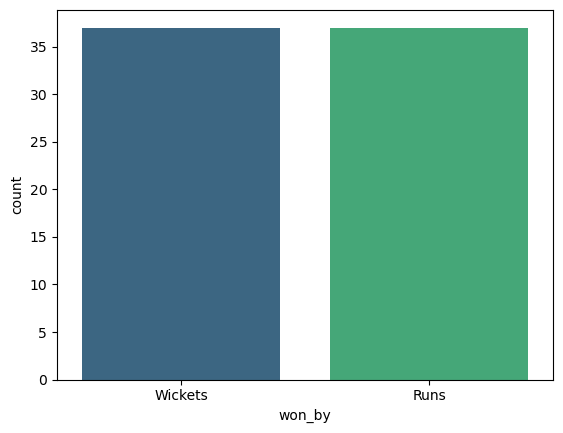

In [30]:
sns.countplot(x=ipl["won_by"], palette="viridis")

**Key Player Performances**

1. Most "Player of the Match" Awards

C:\Users\ashif\AppData\Local\Temp\ipykernel_2308\1867149081.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_otm.values , y = player_otm.index , palette="rainbow")


<Axes: ylabel='player_of_the_match'>

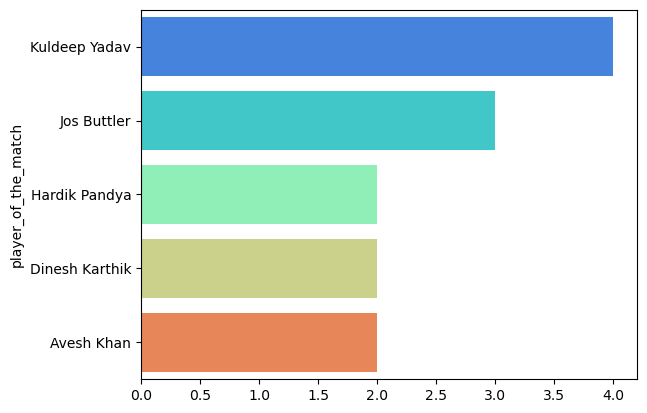

In [37]:
player_otm = ipl["player_of_the_match"].value_counts().sort_values(ascending=False).head()
sns.barplot(x=player_otm.values , y = player_otm.index , palette="rainbow")

2. Top Scorers

<Axes: ylabel='top_scorer'>

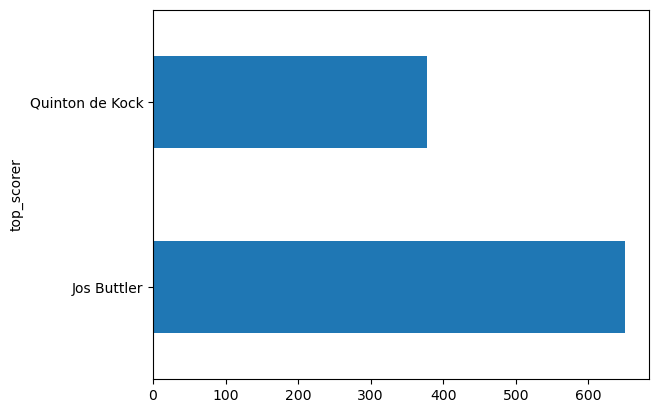

In [47]:
high = ipl.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high.plot(kind = 'barh')

3. 10 Best Bowling Figures

<Axes: ylabel='best_bowling'>

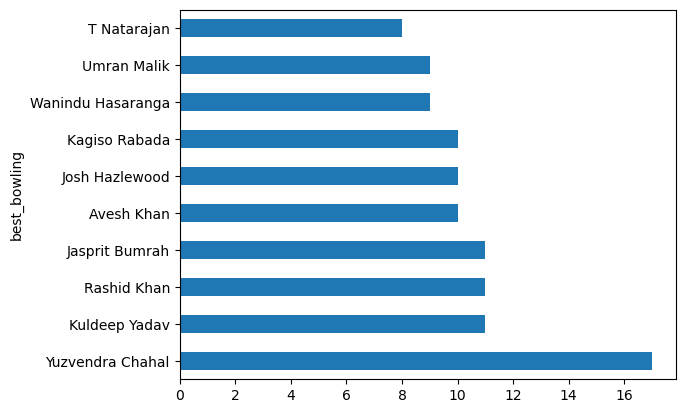

In [48]:
ipl['highest_wickets'] = ipl['best_bowling_figure'].apply(lambda x :x.split('--')[0])
ipl['highest_wickets'] = ipl['highest_wickets'].astype(int)
top_bowlers = ipl.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers.plot(kind = 'barh')

**Venue Analysis**

1. Most Matches Played by Venue

<Axes: ylabel='venue'>

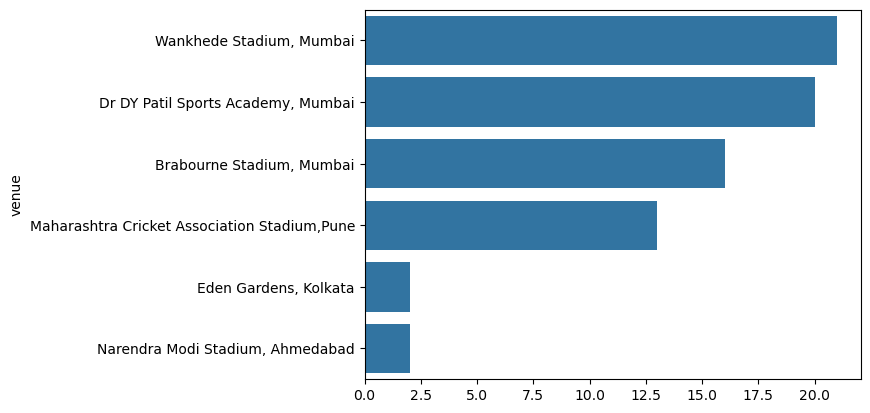

In [51]:
ven =ipl["venue"].value_counts()
sns.barplot(y=ven.index , x=ven.values)

**Custom Questions & Insights**

1. Who won the highest margin by runs?

In [59]:
run_win = ipl[ipl["won_by"] == "Runs"].sort_values(by="margin" , ascending=False)[["match_winner" , "margin"]]
run_win.head(1)

,match_winner,margin
54,Chennai,91


2. Which player had the highest individual score?

In [64]:
ipl[ipl['highscore'] == ipl['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


3. Which bowler had the best bowling figures?

In [66]:
ipl[ipl['highest_wickets'] == ipl['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
